<a href="https://colab.research.google.com/github/Phonghuynh66/Artificial-Intelligence-Class/blob/master/CNN_Recognition_Vie_10Dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Huynh Quoc Phong _ 20149078 
# Nhan dien 10 mon an Vietnam

In [1]:
from os import listdir
import numpy as np
from numpy import asarray, save
from keras.utils import load_img, img_to_array
from google.colab import drive 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder='/content/drive/MyDrive/Food'
photos,labels=list(),list()

for file in listdir(folder):
   if file.endswith('.jpg'):
     output=0
     if file.startswith('Banhchung'):
       output=1
     if file.startswith('Banhmi'):
       output=2
     if file.startswith('Banhtrungthu'):
       output=3
     if file.startswith('Banhxeo'):
       output=4
     if file.startswith('Bundau'):
       output=5
     if file.startswith('Comtam'):
       output=6
     if file.startswith('Galuoc'):
       output=7
     if file.startswith('Goicuon'):
       output=8
     if file.startswith('Pho'):
       output=9
     if file.startswith('Thitkho'):
       output=10
     if file.startswith('Xoilac'):
       output=11
     photo=load_img(folder+'/'+file,target_size=(200,200))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('money_photos.npy',photos)
save('money_labels.npy',labels)

import pickle
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('pix.data','wb')
pickle.dump((photos,labels),file)
file.close()

def load_data():
    file=open('pix.data','rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)
   
classes=11

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

batch_size=64
epochs=60   

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1) 

(220, 200, 200, 3) (220,)
X_train: (176, 200, 200, 3)
X_test: (44, 200, 200, 3)
y_train: (176, 11)
y_test: (44, 11)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_p

In [3]:
model.save("/content/drive/MyDrive/Food/Food.h5")

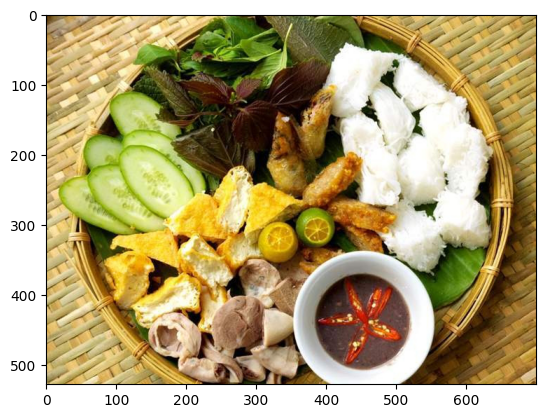

In [4]:
from keras.saving.saving_lib import load_model
from keras.models import load_model
import matplotlib.pyplot as plt

model=load_model("/content/drive/MyDrive/Food/Food.h5")
img=load_img('/content/drive/MyDrive/Food/Bundau (10).jpg')
plt.imshow(img)
plt.show()

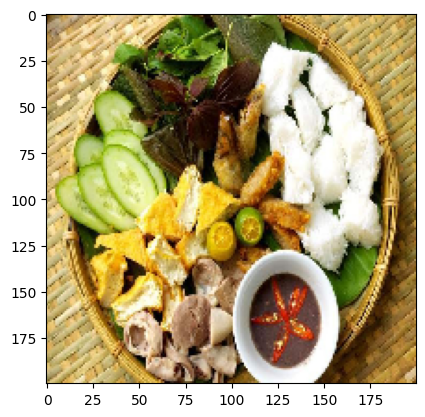

In [5]:

img=load_img('/content/drive/MyDrive/Food/Bundau (10).jpg',target_size=(200,200))
plt.imshow(img)


In [6]:
class_name = ['Banh_chung','Banh_mi','Banh_trung_thu','Banh_xeo','Bun_dau','Com_tam','Ga_luoc','Goi_cuon','Pho','Thit_kho','Xoi_lac']
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255
predict=model.predict(img)
print("Day la ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))


1/1 [==============================] - 0s 231ms/step
This is  Bun_dau [1.2977807e-06 3.3629554e-08 4.4628797e-12 1.5069027e-06 9.9999654e-01
 6.6944670e-12 9.8563326e-09 1.6934967e-10 6.2537185e-07 7.4945588e-12
 1.8023610e-09]
0.99999654


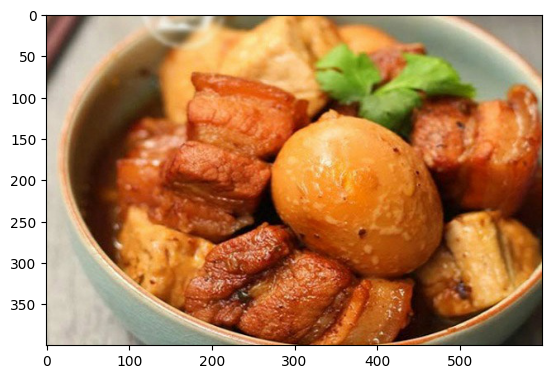

1/1 [==============================] - 0s 36ms/step
Day la   Thit_kho [3.5403770e-20 5.2965299e-07 6.3594896e-08 3.8349571e-10 3.2597286e-11
 7.9747479e-11 6.0942652e-14 2.3747627e-16 3.6616538e-13 9.9999940e-01
 1.0648228e-15]
0.9999994


In [7]:
img1=load_img('/content/drive/MyDrive/Food/Thitkho (14).jpg')
plt.imshow(img1)
plt.show()

img1=load_img('/content/drive/MyDrive/Food/Thitkho (14).jpg',target_size=(200,200))
img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("Day la  ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))